In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [6]:
data = pd.read_csv('data/processed/nnapartment_more_info_nn_only.csv')
data

,rooms,area1,area2,area3,district,floor,total_floors,building_type,year,additional_info,price
0,2.0,44.0,30.0,6.0,Автозаводский район,4,4,кирпич,1961.0,хрущ.,4900000
1,2.0,32.0,18.1,6.8,Советский район,1,3,кирпич,1958.0,стал.,4000000
2,2.0,45.0,31.2,6.0,Канавинский район,2,5,кирпич,1972.0,хрущ.,4300000
3,1.0,30.8,18.1,5.8,Канавинский район,2,5,кирпич,1965.0,хрущ.,4200000
4,2.0,48.0,26.0,9.0,Московский район,5,10,панель,2016.0,undefind,7150000
...,...,...,...,...,...,...,...,...,...,...,...
316,1.0,29.9,18.0,6.1,Автозаводский район,2,2,шлакоблок,1948.0,народн. стр.,2999000
317,1.0,44.5,21.4,9.8,Нижегородский район,4,17,блок+утеплитель,2008.0,undefind,7450000
318,1.0,31.5,17.8,5.9,Ленинский район,3,5,кирпич,1962.0,хрущ.,4500000
319,1.0,30.9,18.7,5.5,Московский район,1,5,панель,1969.0,брежн.,3620000


In [7]:
X_claster = data.drop(["rooms","total_floors","area2","area3","district","floor","price","building_type","additional_info"], axis =1)
X_claster[:9]

,area1,year
0,44.0,1961.0
1,32.0,1958.0
2,45.0,1972.0
3,30.8,1965.0
4,48.0,2016.0
5,12.7,1978.0
6,27.6,2021.0
7,44.8,1971.0
8,59.1,1963.0


In [14]:
X_arr=np.array(X_claster)
X_arr.shape

(321, 2)

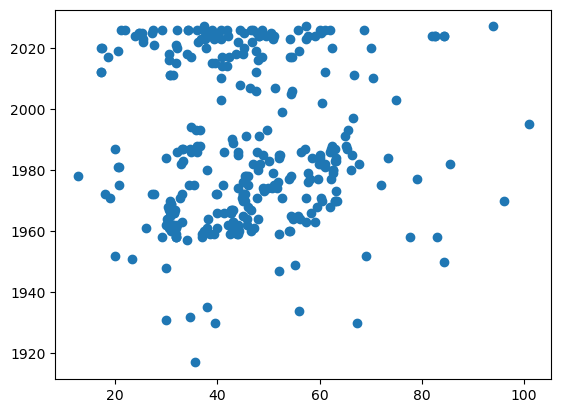

In [49]:
#look to the plot

plt.scatter(X_arr[:, 0], X_arr[:, 1])

In [50]:
#find our k (but obviously k=2 )

def find_optimal_k(X, max_k=10):
    distortions = []
    for k in range(1, max_k + 1):
        centroids, labels = k_means(X, k)
        distortion = 0
        for i in range(k):
            distortion += np.sum((X[labels == i] - centroids[i])**2)
        distortions.append(distortion)
    
    # Plot the elbow curve
    plt.plot(range(1, max_k + 1), distortions, marker='o')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('WCSS')
    plt.title('Elbow Method')
    plt.show()

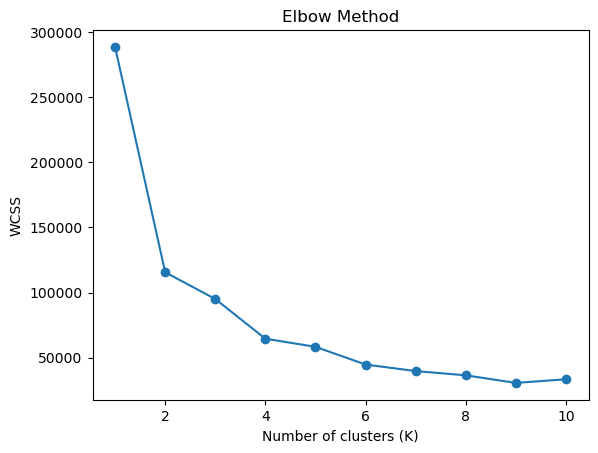

In [17]:
find_optimal_k(X_arr, max_k=10)

In [18]:
#take k=2

In [19]:
def k_means(X, K, max_iters=100):
    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], K, replace=False)]
    for i in range(max_iters):
        # Step 1: Assignment
        # Calculate distances between each point and centroids
        distances = ((X - centroids[:, np.newaxis])**2).sum(axis=2)
        # Assign each point to the cluster with the nearest centroid
        labels = np.argmin(distances, axis=0)
        
        # Step 2: Update centroids
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])
        
        # Check for convergence
        if np.allclose(centroids, new_centroids):
#             print(f'convergence {i}')
            break
        
        centroids = new_centroids
    
    return centroids, labels

In [20]:
k_means(X_arr, 2)

(array([[  44.83419643, 2019.61607143],
        [  46.29665072, 1970.92344498]]),
 array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
        0, 0, 1, 1, 1, 1, 1, 0

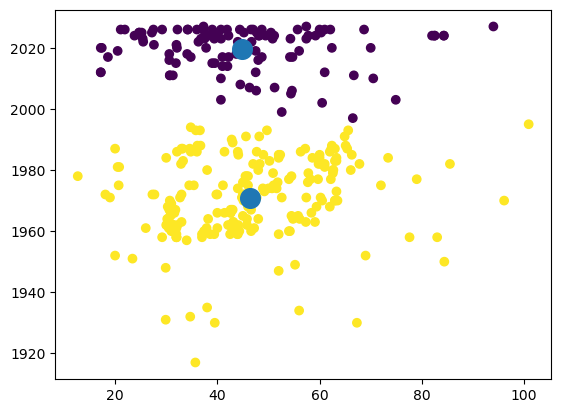

In [52]:
centroids, labels = k_means(X_arr, 2)

plt.scatter(X_arr[:, 0], X_arr[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1],s=200)
plt.show()

In [22]:
#k = 2 acceptable

In [23]:
type(labels.shape[0])

int

In [24]:
type(labels)

numpy.ndarray

In [25]:
labels[20]==0

True

In [53]:
cat_lebels=[]
for i in range(0,labels.shape[0]):
    if labels[i] == 0:
        cat_lebels.append("новый_дом")
    else:
        cat_lebels.append("старый_дом")
cat_lebels=np.array(cat_lebels)
cat_lebels.shape

(321,)

In [54]:
data["year_type"] = pd.Series(cat_lebels)
data

,rooms,area1,district,building_type,price,year_type,no_first_no_last,area3_bins
0,2.0,44.0,Автозаводский район,кирпич,4900000,старый_дом,False,1.0
1,2.0,32.0,Советский район,кирпич,4000000,старый_дом,False,1.0
2,2.0,45.0,Канавинский район,кирпич,4300000,старый_дом,True,1.0
3,1.0,30.8,Канавинский район,кирпич,4200000,старый_дом,True,0.0
4,2.0,48.0,Московский район,панель,7150000,новый_дом,True,1.0
...,...,...,...,...,...,...,...,...
316,1.0,29.9,Автозаводский район,шлакоблок,2999000,старый_дом,False,1.0
317,1.0,44.5,Нижегородский район,блок+утеплитель,7450000,новый_дом,True,1.0
318,1.0,31.5,Ленинский район,кирпич,4500000,старый_дом,True,0.0
319,1.0,30.9,Московский район,панель,3620000,старый_дом,False,0.0


In [55]:
data = data.drop(["year"], axis =1)

KeyError: "['year'] not found in axis"

In [ ]:
data.head()

In [ ]:
cols = ['rooms', 'area1', 'area3', 'district', 'floor', 'total_floors',
       'building_type', 'price',"year_type"]

In [ ]:
data=data[cols].copy()

In [32]:
data.rooms.value_counts()

2.0    114
1.0    114
3.0     70
0.8     14
4.0      9
Name: rooms, dtype: int64

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rooms          321 non-null    float64
 1   area1          321 non-null    float64
 2   area3          321 non-null    float64
 3   district       321 non-null    object 
 4   floor          321 non-null    int64  
 5   total_floors   321 non-null    int64  
 6   building_type  321 non-null    object 
 7   price          321 non-null    int64  
 8   year_type      321 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 22.7+ KB


In [34]:
#data['rooms_count'] = data.rooms.astype('float')

In [35]:
#data.head()

In [36]:
(data.floor != 1)&(data.floor != data.total_floors)

0      False
1      False
2       True
3       True
4       True
       ...  
316    False
317     True
318     True
319    False
320     True
Length: 321, dtype: bool

In [37]:
data['no_first_no_last'] = (data.floor != 1)&(data.floor != data.total_floors)

In [38]:
data.head()

,rooms,area1,area3,district,floor,total_floors,building_type,price,year_type,no_first_no_last
0,2.0,44.0,6.0,Автозаводский район,4,4,кирпич,4900000,новый_дом,False
1,2.0,32.0,6.8,Советский район,1,3,кирпич,4000000,новый_дом,False
2,2.0,45.0,6.0,Канавинский район,2,5,кирпич,4300000,новый_дом,True
3,1.0,30.8,5.8,Канавинский район,2,5,кирпич,4200000,новый_дом,True
4,2.0,48.0,9.0,Московский район,5,10,панель,7150000,новый_дом,True


<Axes: >

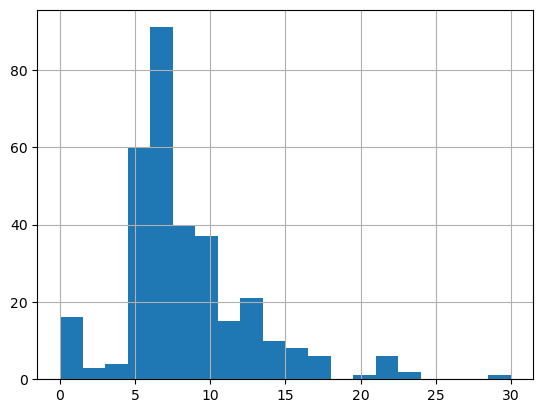

In [39]:
data.area3.hist(bins=20)

In [40]:
from sklearn.preprocessing import KBinsDiscretizer

est = KBinsDiscretizer(
    n_bins=5, encode='ordinal', strategy='uniform', subsample=None
)
est.fit(data.area3.values.reshape(-1, 1))
Xt = est.transform(data.area3.values.reshape(-1, 1))
Xt[:5]

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.]])

In [41]:
data['area3_bins'] = est.transform(data.area3.values.reshape(-1, 1))
data.head()

,rooms,area1,area3,district,floor,total_floors,building_type,price,year_type,no_first_no_last,area3_bins
0,2.0,44.0,6.0,Автозаводский район,4,4,кирпич,4900000,новый_дом,False,1.0
1,2.0,32.0,6.8,Советский район,1,3,кирпич,4000000,новый_дом,False,1.0
2,2.0,45.0,6.0,Канавинский район,2,5,кирпич,4300000,новый_дом,True,1.0
3,1.0,30.8,5.8,Канавинский район,2,5,кирпич,4200000,новый_дом,True,0.0
4,2.0,48.0,9.0,Московский район,5,10,панель,7150000,новый_дом,True,1.0


<Axes: >

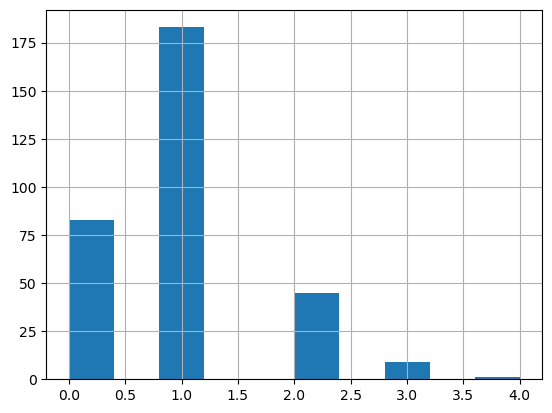

In [42]:
data.area3_bins.hist()

In [43]:
data = data.drop(['area3','floor','total_floors'], axis=1)
data

,rooms,area1,district,building_type,price,year_type,no_first_no_last,area3_bins
0,2.0,44.0,Автозаводский район,кирпич,4900000,новый_дом,False,1.0
1,2.0,32.0,Советский район,кирпич,4000000,новый_дом,False,1.0
2,2.0,45.0,Канавинский район,кирпич,4300000,новый_дом,True,1.0
3,1.0,30.8,Канавинский район,кирпич,4200000,новый_дом,True,0.0
4,2.0,48.0,Московский район,панель,7150000,новый_дом,True,1.0
...,...,...,...,...,...,...,...,...
316,1.0,29.9,Автозаводский район,шлакоблок,2999000,новый_дом,False,1.0
317,1.0,44.5,Нижегородский район,блок+утеплитель,7450000,новый_дом,True,1.0
318,1.0,31.5,Ленинский район,кирпич,4500000,новый_дом,True,0.0
319,1.0,30.9,Московский район,панель,3620000,новый_дом,False,0.0


In [44]:
data

,rooms,area1,district,building_type,price,year_type,no_first_no_last,area3_bins
0,2.0,44.0,Автозаводский район,кирпич,4900000,новый_дом,False,1.0
1,2.0,32.0,Советский район,кирпич,4000000,новый_дом,False,1.0
2,2.0,45.0,Канавинский район,кирпич,4300000,новый_дом,True,1.0
3,1.0,30.8,Канавинский район,кирпич,4200000,новый_дом,True,0.0
4,2.0,48.0,Московский район,панель,7150000,новый_дом,True,1.0
...,...,...,...,...,...,...,...,...
316,1.0,29.9,Автозаводский район,шлакоблок,2999000,новый_дом,False,1.0
317,1.0,44.5,Нижегородский район,блок+утеплитель,7450000,новый_дом,True,1.0
318,1.0,31.5,Ленинский район,кирпич,4500000,новый_дом,True,0.0
319,1.0,30.9,Московский район,панель,3620000,новый_дом,False,0.0


In [45]:
#data.district.unique()

In [46]:
#dist = [x for x in data.district.unique() if 'район' in x]
#dist

In [47]:
#data.loc[~data.district.isin(dist), 'district'] = 'Другой'
#data.head(15)

In [48]:
data.to_csv('data/processed/nnapartment_more_info_new_features2.csv', index = False)

**Задание**  

Использовать полученный набор данных для обучения pipeline состоящего из этапов, трансформации данных, конструиррвания признаков, выбора признаков (понижения размерности).

завести аккаунт на github повторить тему окружения (inviroment) (venv)